In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saquibmohiuddin1","key":"5f75d9346722c182aa66f0359e220fb0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d harlfoxem/housesalesprediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 51.1MB/s]


In [ ]:
!ls

housesalesprediction.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("housesalesprediction.zip", "r")
zip_ref.extractall("files")
zip_ref.close()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/files/kc_house_data.csv")

In [ ]:
df

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

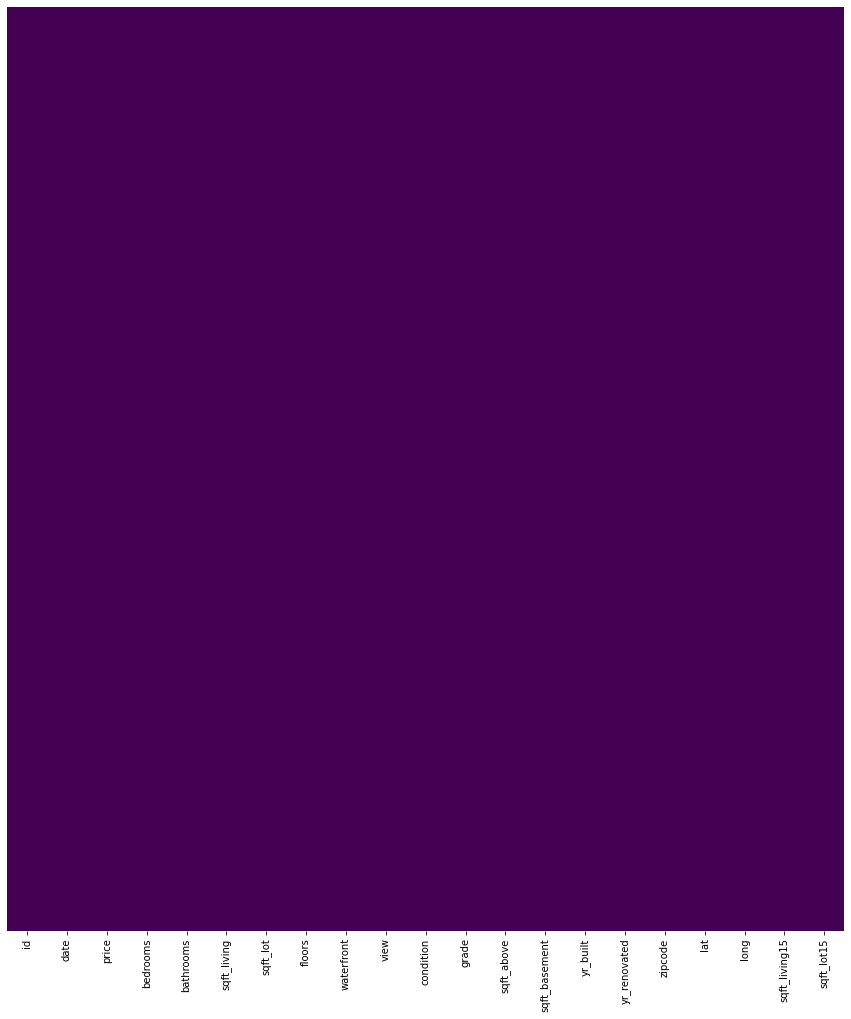

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [ ]:
print(df.isnull().any()) # Checking for missing values. 

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


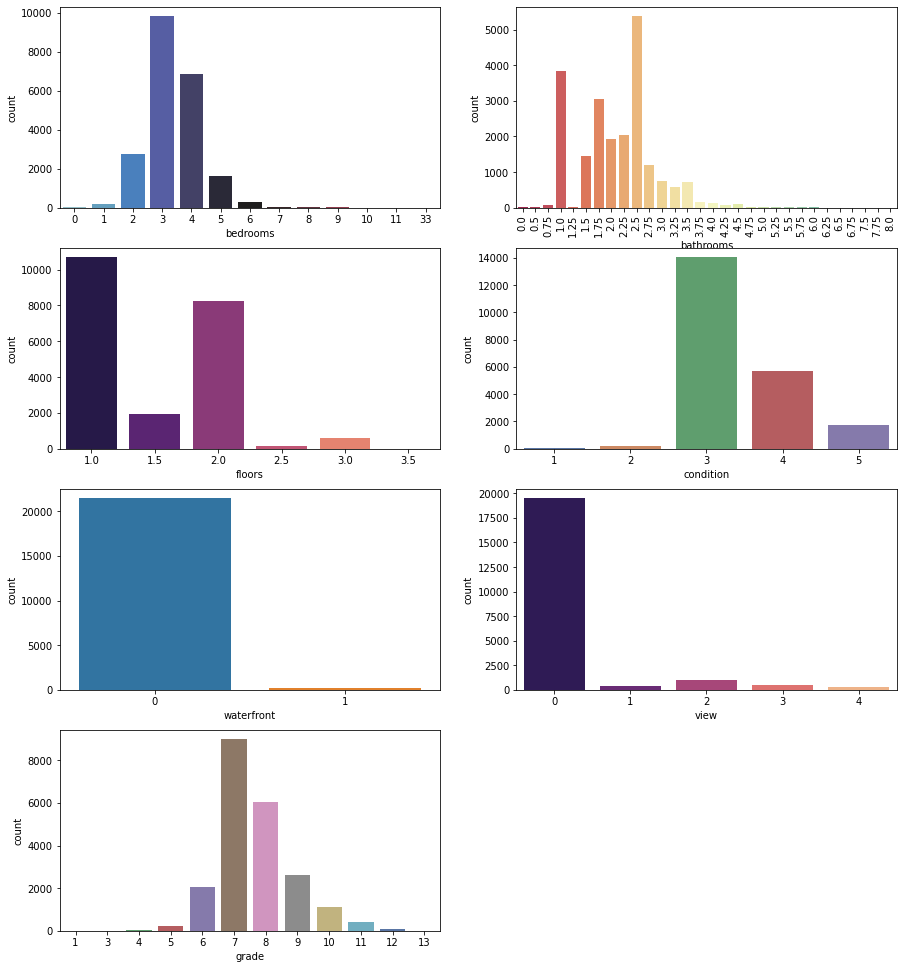

In [ ]:
plt.rcParams['figure.figsize'] = [15, 17]

fig, _ = plt.subplots(4,2)

sns.countplot(x='bedrooms', data=df, ax=_[0][0], palette='icefire')

sns.countplot(x='bathrooms', data=df, ax=_[0][1], palette='Spectral')

_[0][1].tick_params('x', labelrotation=90)

sns.countplot(x='floors', data=df, ax=_[1][0], palette='magma')

sns.countplot(x='condition', data=df, ax=_[1][1], palette='deep')

sns.countplot(x='waterfront', data=df, ax=_[2][0], palette='tab10')

sns.countplot(x='view', data=df, ax=_[2][1], palette='magma')

sns.countplot(x='grade', data=df, ax=_[3][0], palette='deep')

_[3][1].set_visible(False)

plt.show()

Finding Locations where average price is higher 

In [ ]:
print(f'There are {len(df.zipcode.unique())} zipcodes!')

There are 70 zipcodes!


In [ ]:
mean_price_by_zip = df.groupby('zipcode').price.mean().sort_values(ascending=False).reset_index()
mean_price_by_zip.columns = ['zipcode', 'mean_price']

In [ ]:
most_expensive_zips = mean_price_by_zip[:5]['zipcode'].astype('str').unique()

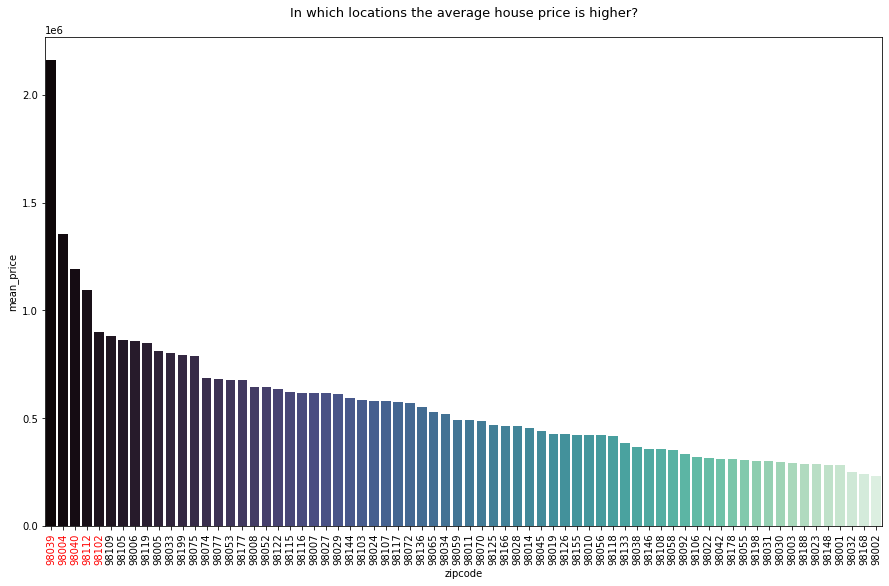

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]

_ = sns.barplot(x='zipcode',
                y='mean_price',
                data=mean_price_by_zip,
                order=mean_price_by_zip.zipcode,
                palette='mako')

plt.xticks(rotation=90)

for tick in _.get_xticklabels():
    if tick.get_text() in most_expensive_zips: tick.set_color('red')

plt.title('In which locations the average house price is higher?',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

In [ ]:
df_most_expensive = df[df.zipcode.isin(most_expensive_zips.astype('int'))]

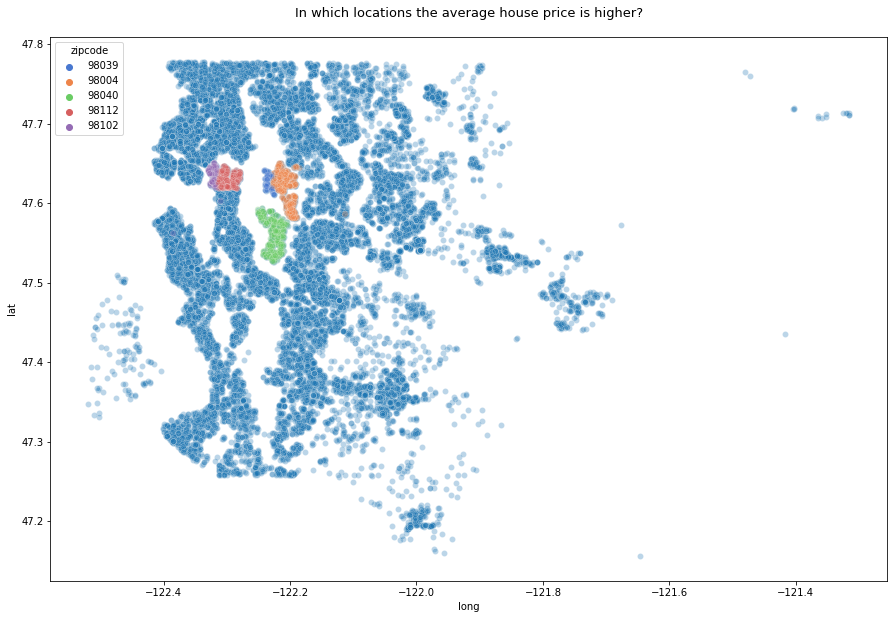

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(x='long',
                y='lat',
                data=df,
                alpha=0.3)

sns.scatterplot(x='long',
                y='lat',
                hue='zipcode',
                hue_order=most_expensive_zips.astype(int),
                data=df_most_expensive,
                alpha=0.3,
                palette="muted")

plt.title('In which locations the average house price is higher?',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

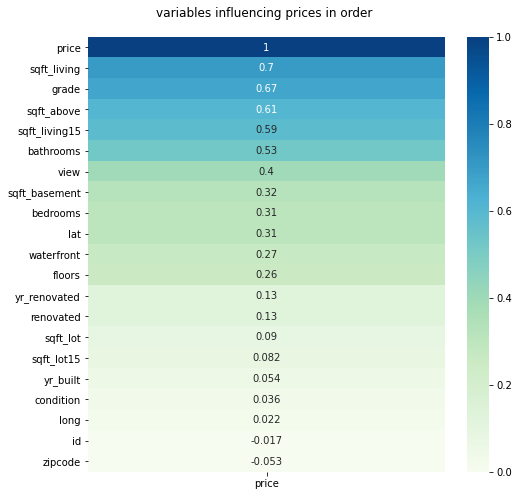

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]

_ = sns.heatmap(df.corr()[['price']]
                .sort_values(by='price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True,
                cmap='GnBu');

_.set_title('variables influencing prices in order ',
            fontdict={'fontsize':12},
            pad=20);

plt.show()

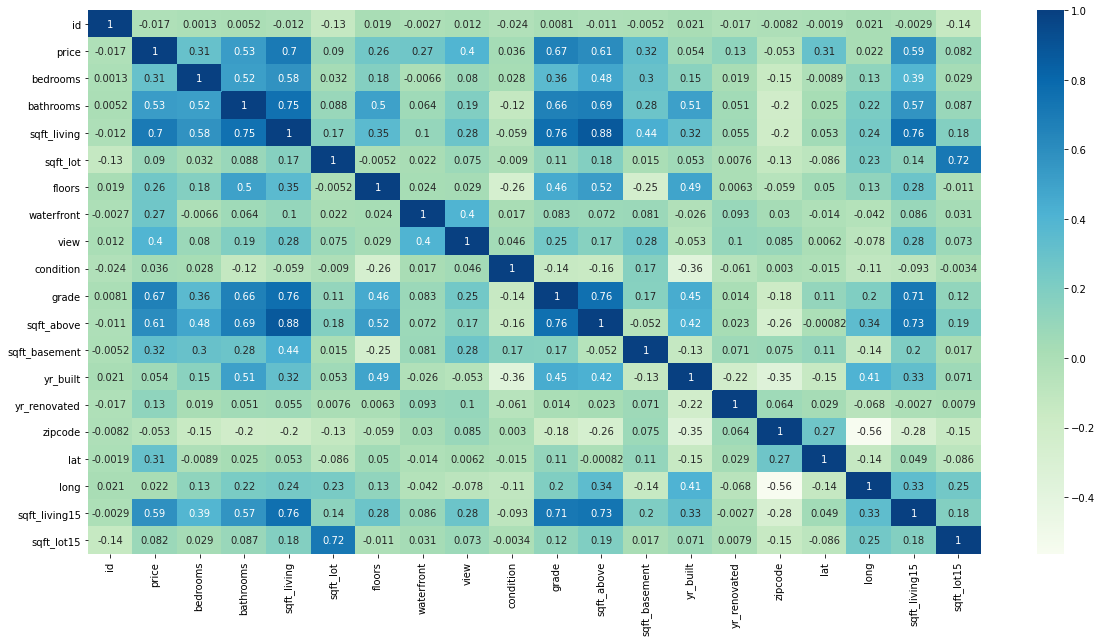

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10)) 
corri = df.corr()
sns.heatmap(corri, cmap = "GnBu", annot = True)

In [ ]:
list_ = []
for x in df['yr_renovated']:
    if x!=0:
        list_.append(1)
    else:
        list_.append(0)
df['renovated'] = list_

Text(0, 0.5, 'price')

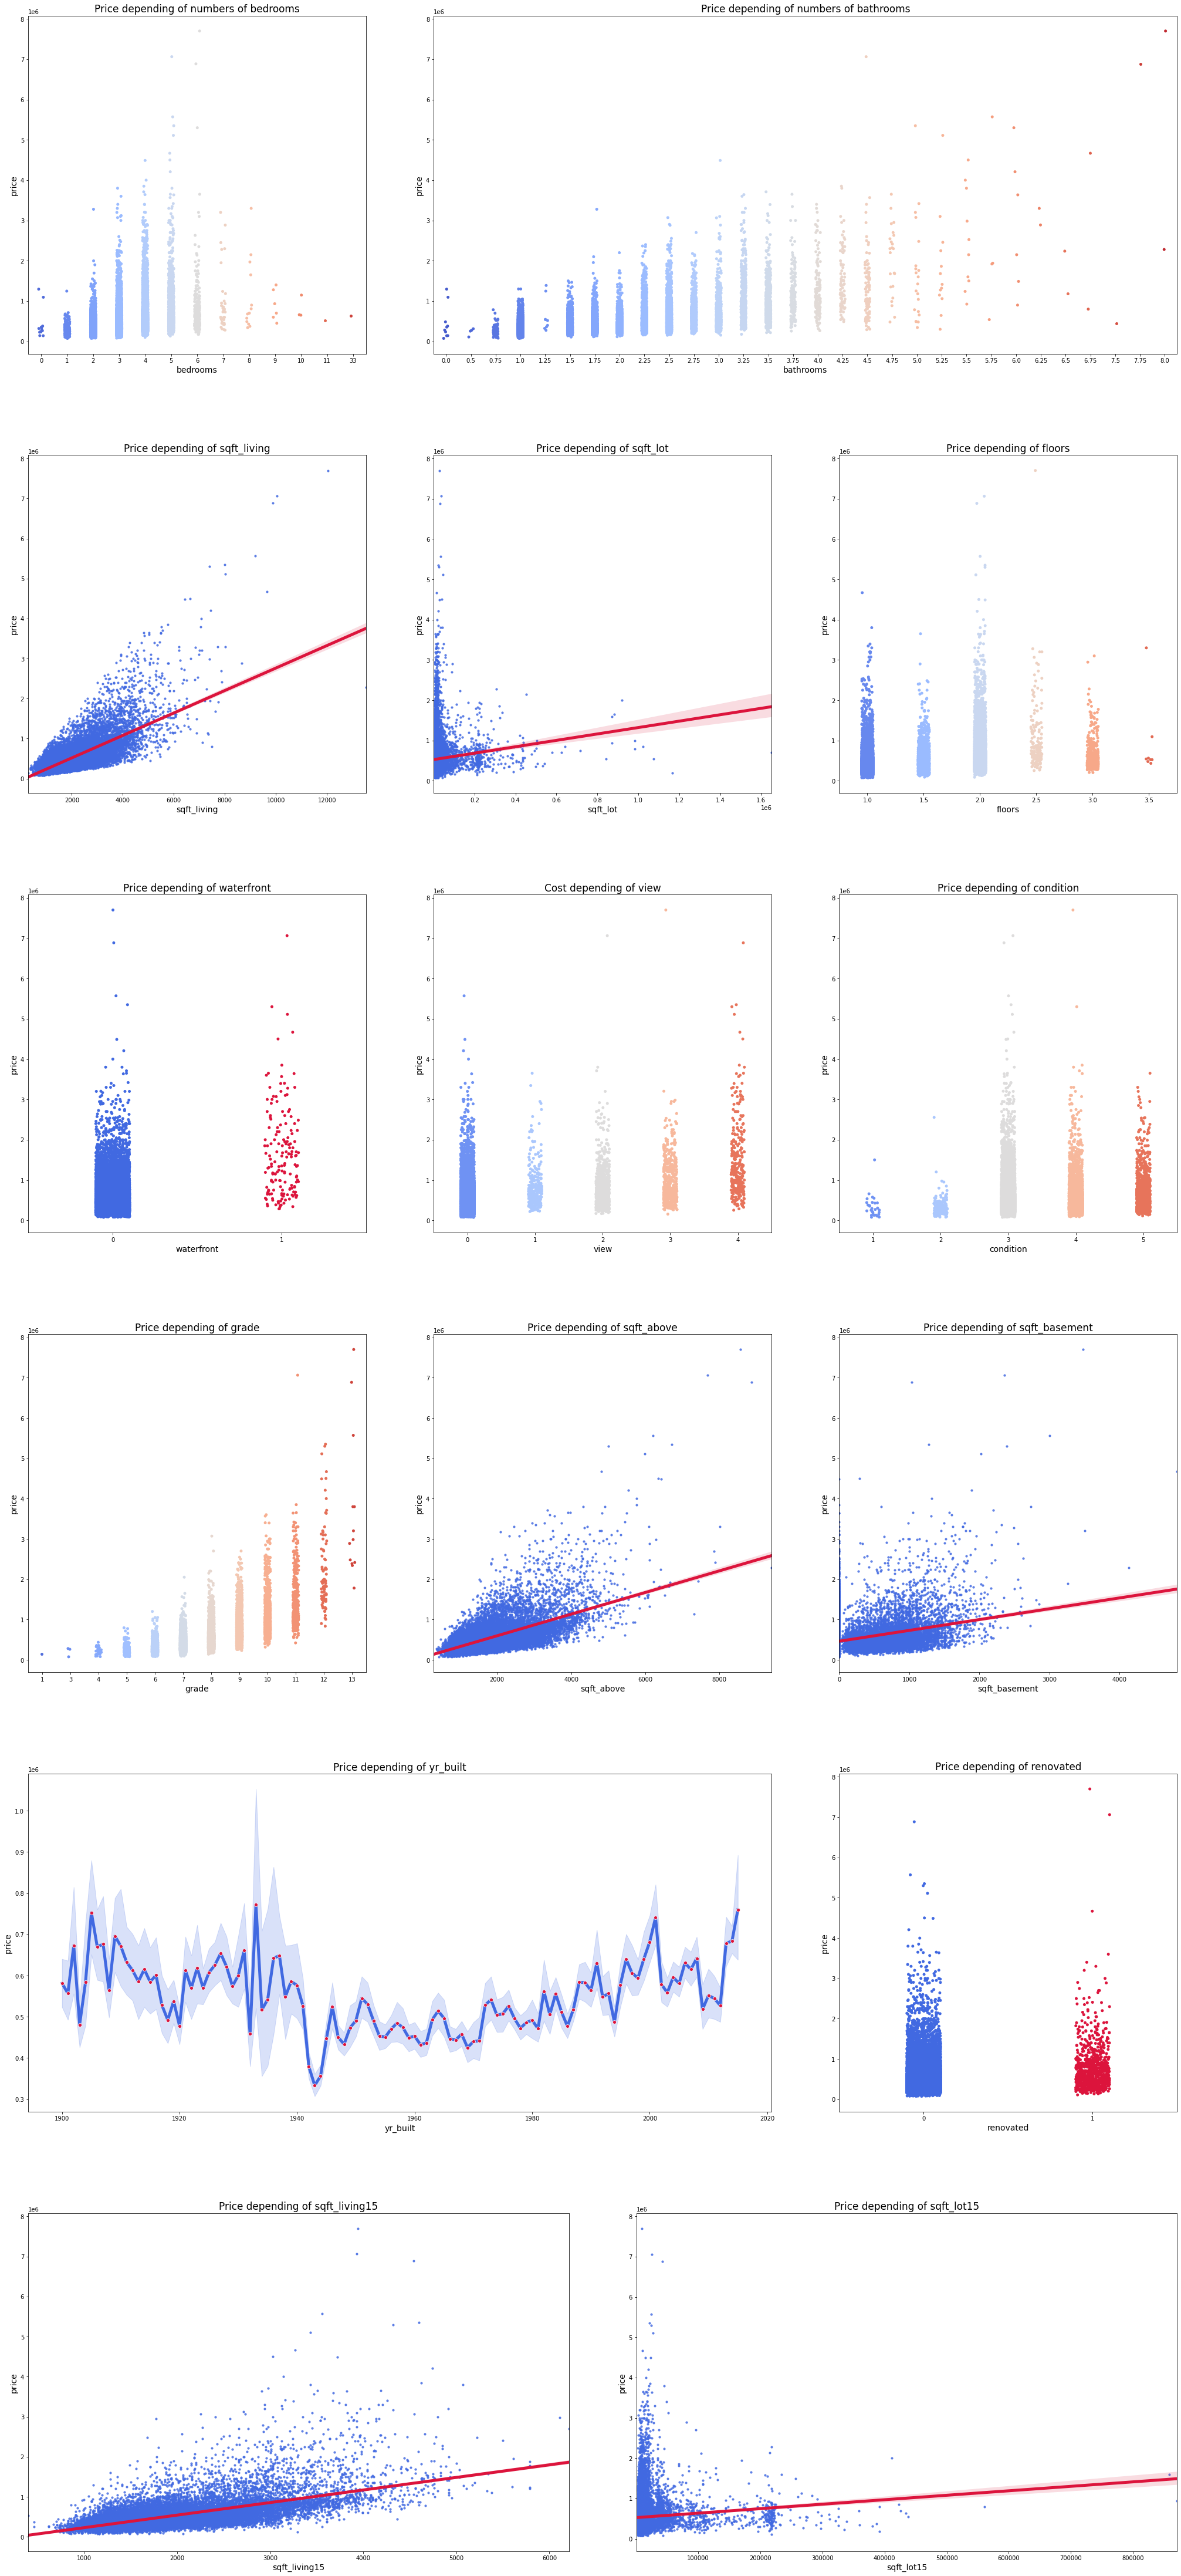

In [ ]:
figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) 
axes2 = figure.add_axes([1.2, 0, 2.2, 1]) 
axes3 = figure.add_axes([0, -1.3, 1, 1]) 
axes4 = figure.add_axes([1.2, -1.3, 1, 1]) 
axes5 = figure.add_axes([2.4, -1.3, 1, 1]) 
axes6 = figure.add_axes([0, -2.6, 1, 1]) 
axes7 = figure.add_axes([1.2, -2.6, 1, 1]) 
axes8 = figure.add_axes([2.4, -2.6, 1, 1]) 
axes9 = figure.add_axes([0, -3.9, 1, 1]) 
axes10 = figure.add_axes([1.2, -3.9, 1, 1]) 
axes11 = figure.add_axes([2.4, -3.9, 1, 1])
axes12 = figure.add_axes([0, -5.2, 2.2, 1]) 
axes13 = figure.add_axes([2.4, -5.2, 1, 1])
axes14 = figure.add_axes([0, -6.5, 1.6, 1]) 
axes15 = figure.add_axes([1.8, -6.5, 1.6, 1]) 

sns.stripplot(x='bedrooms', y='price', data=df, palette='coolwarm', ax=axes1)
axes1.set_title('Price depending of numbers of bedrooms', fontsize=17)
axes1.set_xlabel('bedrooms', fontsize=14)
axes1.set_ylabel('price', fontsize=14)

sns.stripplot(x='bathrooms', y='price', data=df, palette='coolwarm', ax=axes2)
axes2.set_title('Price depending of numbers of bathrooms', fontsize=17)
axes2.set_xlabel('bathrooms', fontsize=14)
axes2.set_ylabel('price', fontsize=14)

sns.regplot(x='sqft_living', y='price', data=df, color='royalblue', ax=axes3, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes3.set_title('Price depending of sqft_living', fontsize=17)
axes3.set_xlabel('sqft_living', fontsize=14)
axes3.set_ylabel('price', fontsize=14)

sns.regplot(x='sqft_lot', y='price', data=df, color='royalblue', ax=axes4, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes4.set_title('Price depending of sqft_lot', fontsize=17)
axes4.set_xlabel('sqft_lot', fontsize=14)
axes4.set_ylabel('price', fontsize=14)

sns.stripplot(x='floors', y='price', data=df, palette='coolwarm', ax=axes5)
axes5.set_title('Price depending of floors', fontsize=17)
axes5.set_xlabel('floors', fontsize=14)
axes5.set_ylabel('price', fontsize=14)

sns.stripplot(x='waterfront', y='price', data=df, palette=['royalblue', 'crimson'], ax=axes6)
axes6.set_title('Price depending of waterfront', fontsize=17)
axes6.set_xlabel('waterfront', fontsize=14)
axes6.set_ylabel('price', fontsize=14)

sns.stripplot(x='view', y='price', data=df, palette='coolwarm', ax=axes7)
axes7.set_title('Cost depending of view', fontsize=17)
axes7.set_xlabel('view', fontsize=14)
axes7.set_ylabel('price', fontsize=14)

sns.stripplot(x='condition', y='price', data=df, palette='coolwarm', ax=axes8)
axes8.set_title('Price depending of condition', fontsize=17)
axes8.set_xlabel('condition', fontsize=14)
axes8.set_ylabel('price', fontsize=14)

sns.stripplot(x='grade', y='price', data=df, palette='coolwarm', ax=axes9)
axes9.set_title('Price depending of grade', fontsize=17)
axes9.set_xlabel('grade', fontsize=14)
axes9.set_ylabel('price', fontsize=14)

sns.regplot(x='sqft_above', y='price', data=df, color='royalblue', ax=axes10, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes10.set_title('Price depending of sqft_above', fontsize=17)
axes10.set_xlabel('sqft_above', fontsize=14)
axes10.set_ylabel('price', fontsize=14)
                         
sns.regplot(x='sqft_basement', y='price', data=df, color='royalblue', ax=axes11, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes11.set_title('Price depending of sqft_basement', fontsize=17)
axes11.set_xlabel('sqft_basement', fontsize=14)
axes11.set_ylabel('price', fontsize=14)

sns.lineplot(x='yr_built', y='price', data=df, color='royalblue', ax=axes12, lw=5, marker='o', markerfacecolor='crimson')
axes12.set_title('Price depending of yr_built', fontsize=17)
axes12.set_xlabel('yr_built', fontsize=14)
axes12.set_ylabel('price', fontsize=14)

sns.stripplot(x='renovated', y='price', data=df, palette=['royalblue', 'crimson'], ax=axes13)
axes13.set_title('Price depending of renovated', fontsize=17)
axes13.set_xlabel('renovated', fontsize=14)
axes13.set_ylabel('price', fontsize=14)

sns.regplot(x='sqft_living15', y='price', data=df, color='royalblue', ax=axes14, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes14.set_title('Price depending of sqft_living15', fontsize=17)
axes14.set_xlabel('sqft_living15', fontsize=14)
axes14.set_ylabel('price', fontsize=14)

sns.regplot(x='sqft_lot15', y='price', data=df, color='royalblue', ax=axes15, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes15.set_title('Price depending of sqft_lot15', fontsize=17)
axes15.set_xlabel('sqft_lot15', fontsize=14)
axes15.set_ylabel('price', fontsize=14)

In [ ]:
import seaborn as sns 
# sns.pairplot(df)

## Data Pre-Processing

In [ ]:
df_new = df.drop(['id',"date","lat","long","zipcode"], axis = 1)
df_new

price  bedrooms  bathrooms  ...  yr_renovated  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...             0           1340        5650
1      538000.0         3       2.25  ...          1991           1690        7639
2      180000.0         2       1.00  ...             0           2720        8062
3      604000.0         4       3.00  ...             0           1360        5000
4      510000.0         3       2.00  ...             0           1800        7503
...         ...       ...        ...  ...           ...            ...         ...
21608  360000.0         3       2.50  ...             0           1530        1509
21609  400000.0         4       2.50  ...             0           1830        7200
21610  402101.0         2       0.75  ...             0           1020        2007
21611  400000.0         3       2.50  ...             0           1410        1287
21612  325000.0         2       0.75  ...             0           1020        1357

[21613 rows x 16 columns]

In [ ]:
df_new["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [ ]:
def age_house(x):
  if x > 0:
    return 2021 - x
  else:
    return 0

In [ ]:
def age_renovated(x):
  if x > 0:
    return 2021 - x
  else:
    return 0

In [ ]:
df_new["yr_built"] = df_new["yr_built"].apply(age_house)

In [ ]:
df_new

price  bedrooms  bathrooms  ...  yr_renovated  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...             0           1340        5650
1      538000.0         3       2.25  ...          1991           1690        7639
2      180000.0         2       1.00  ...             0           2720        8062
3      604000.0         4       3.00  ...             0           1360        5000
4      510000.0         3       2.00  ...             0           1800        7503
...         ...       ...        ...  ...           ...            ...         ...
21608  360000.0         3       2.50  ...             0           1530        1509
21609  400000.0         4       2.50  ...             0           1830        7200
21610  402101.0         2       0.75  ...             0           1020        2007
21611  400000.0         3       2.50  ...             0           1410        1287
21612  325000.0         2       0.75  ...             0           1020        1357

[21613 rows x 16 columns]

In [ ]:
df_new["yr_renovated"] = df_new["yr_renovated"].apply(age_renovated)

In [ ]:
df_new

price  bedrooms  bathrooms  ...  yr_renovated  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...             0           1340        5650
1      538000.0         3       2.25  ...            30           1690        7639
2      180000.0         2       1.00  ...             0           2720        8062
3      604000.0         4       3.00  ...             0           1360        5000
4      510000.0         3       2.00  ...             0           1800        7503
...         ...       ...        ...  ...           ...            ...         ...
21608  360000.0         3       2.50  ...             0           1530        1509
21609  400000.0         4       2.50  ...             0           1830        7200
21610  402101.0         2       0.75  ...             0           1020        2007
21611  400000.0         3       2.50  ...             0           1410        1287
21612  325000.0         2       0.75  ...             0           1020        1357

[21613 rows x 16 columns]

In [ ]:
df_new["yr_built"].unique()

array([ 66,  70,  88,  56,  34,  20,  26,  58,  61,  18,  79,  94,  44,
       121,  42,  27, 105, 100,  52,  74,  53,  36,  80, 106, 112,  73,
        16,  92,  40,  91, 117,  25,  21,  37,   7,  99,  62,  55,  68,
        71,  13,  30,  67,  48,  96,  32,  49,  35,  65,  19,  29,  57,
        69,  60,  15,  33,  59,  82,  75,  54,  46,  41, 111,  38,  43,
       116,  50,  11,  76,  97,  31, 107,  95,  17,  98,  14,  45,  72,
        22, 120,  28, 101,  24,  78,  64,  81, 103,  93,  47, 110,  85,
        84,  39, 113,  90,  23, 108,   8, 114,  63,   9, 109,  10, 104,
        89,  77, 119,  12, 118,  51,   6,  87,  83, 102, 115,  86])

#### Dummy Variable Trap - do not include all dummy variables, always omit one dummy variable. 

In Multiple linear regression, feature scaling is not required as coeffcients will offset the weights. 

In [ ]:
df2 = df_new[df_new.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0]]]

In [ ]:
df2 

bedrooms  bathrooms  sqft_living  ...  sqft_living15  sqft_lot15     price
0             3       1.00         1180  ...           1340        5650  221900.0
1             3       2.25         2570  ...           1690        7639  538000.0
2             2       1.00          770  ...           2720        8062  180000.0
3             4       3.00         1960  ...           1360        5000  604000.0
4             3       2.00         1680  ...           1800        7503  510000.0
...         ...        ...          ...  ...            ...         ...       ...
21608         3       2.50         1530  ...           1530        1509  360000.0
21609         4       2.50         2310  ...           1830        7200  400000.0
21610         2       0.75         1020  ...           1020        2007  402101.0
21611         3       2.50         1600  ...           1410        1287  400000.0
21612         2       0.75         1020  ...           1020        1357  325000.0

[21613 rows x 16 columns]

In [ ]:
df2 = df2.rename(columns={"yr_built": "age_yr", "yr_renovated": "age_renovated"})

In [ ]:
df2

bedrooms  bathrooms  sqft_living  ...  sqft_living15  sqft_lot15     price
0             3       1.00         1180  ...           1340        5650  221900.0
1             3       2.25         2570  ...           1690        7639  538000.0
2             2       1.00          770  ...           2720        8062  180000.0
3             4       3.00         1960  ...           1360        5000  604000.0
4             3       2.00         1680  ...           1800        7503  510000.0
...         ...        ...          ...  ...            ...         ...       ...
21608         3       2.50         1530  ...           1530        1509  360000.0
21609         4       2.50         2310  ...           1830        7200  400000.0
21610         2       0.75         1020  ...           1020        2007  402101.0
21611         3       2.50         1600  ...           1410        1287  400000.0
21612         2       0.75         1020  ...           1020        1357  325000.0

[21613 rows x 16 columns]

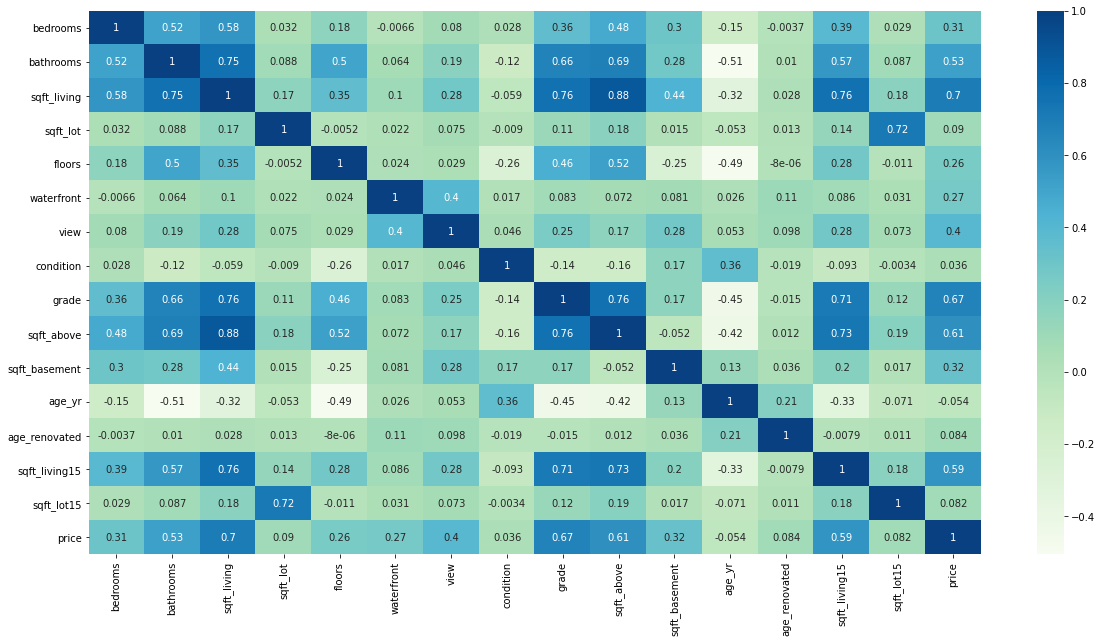

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10)) 
corri = df2.corr()
sns.heatmap(corri, cmap = "GnBu", annot = True)

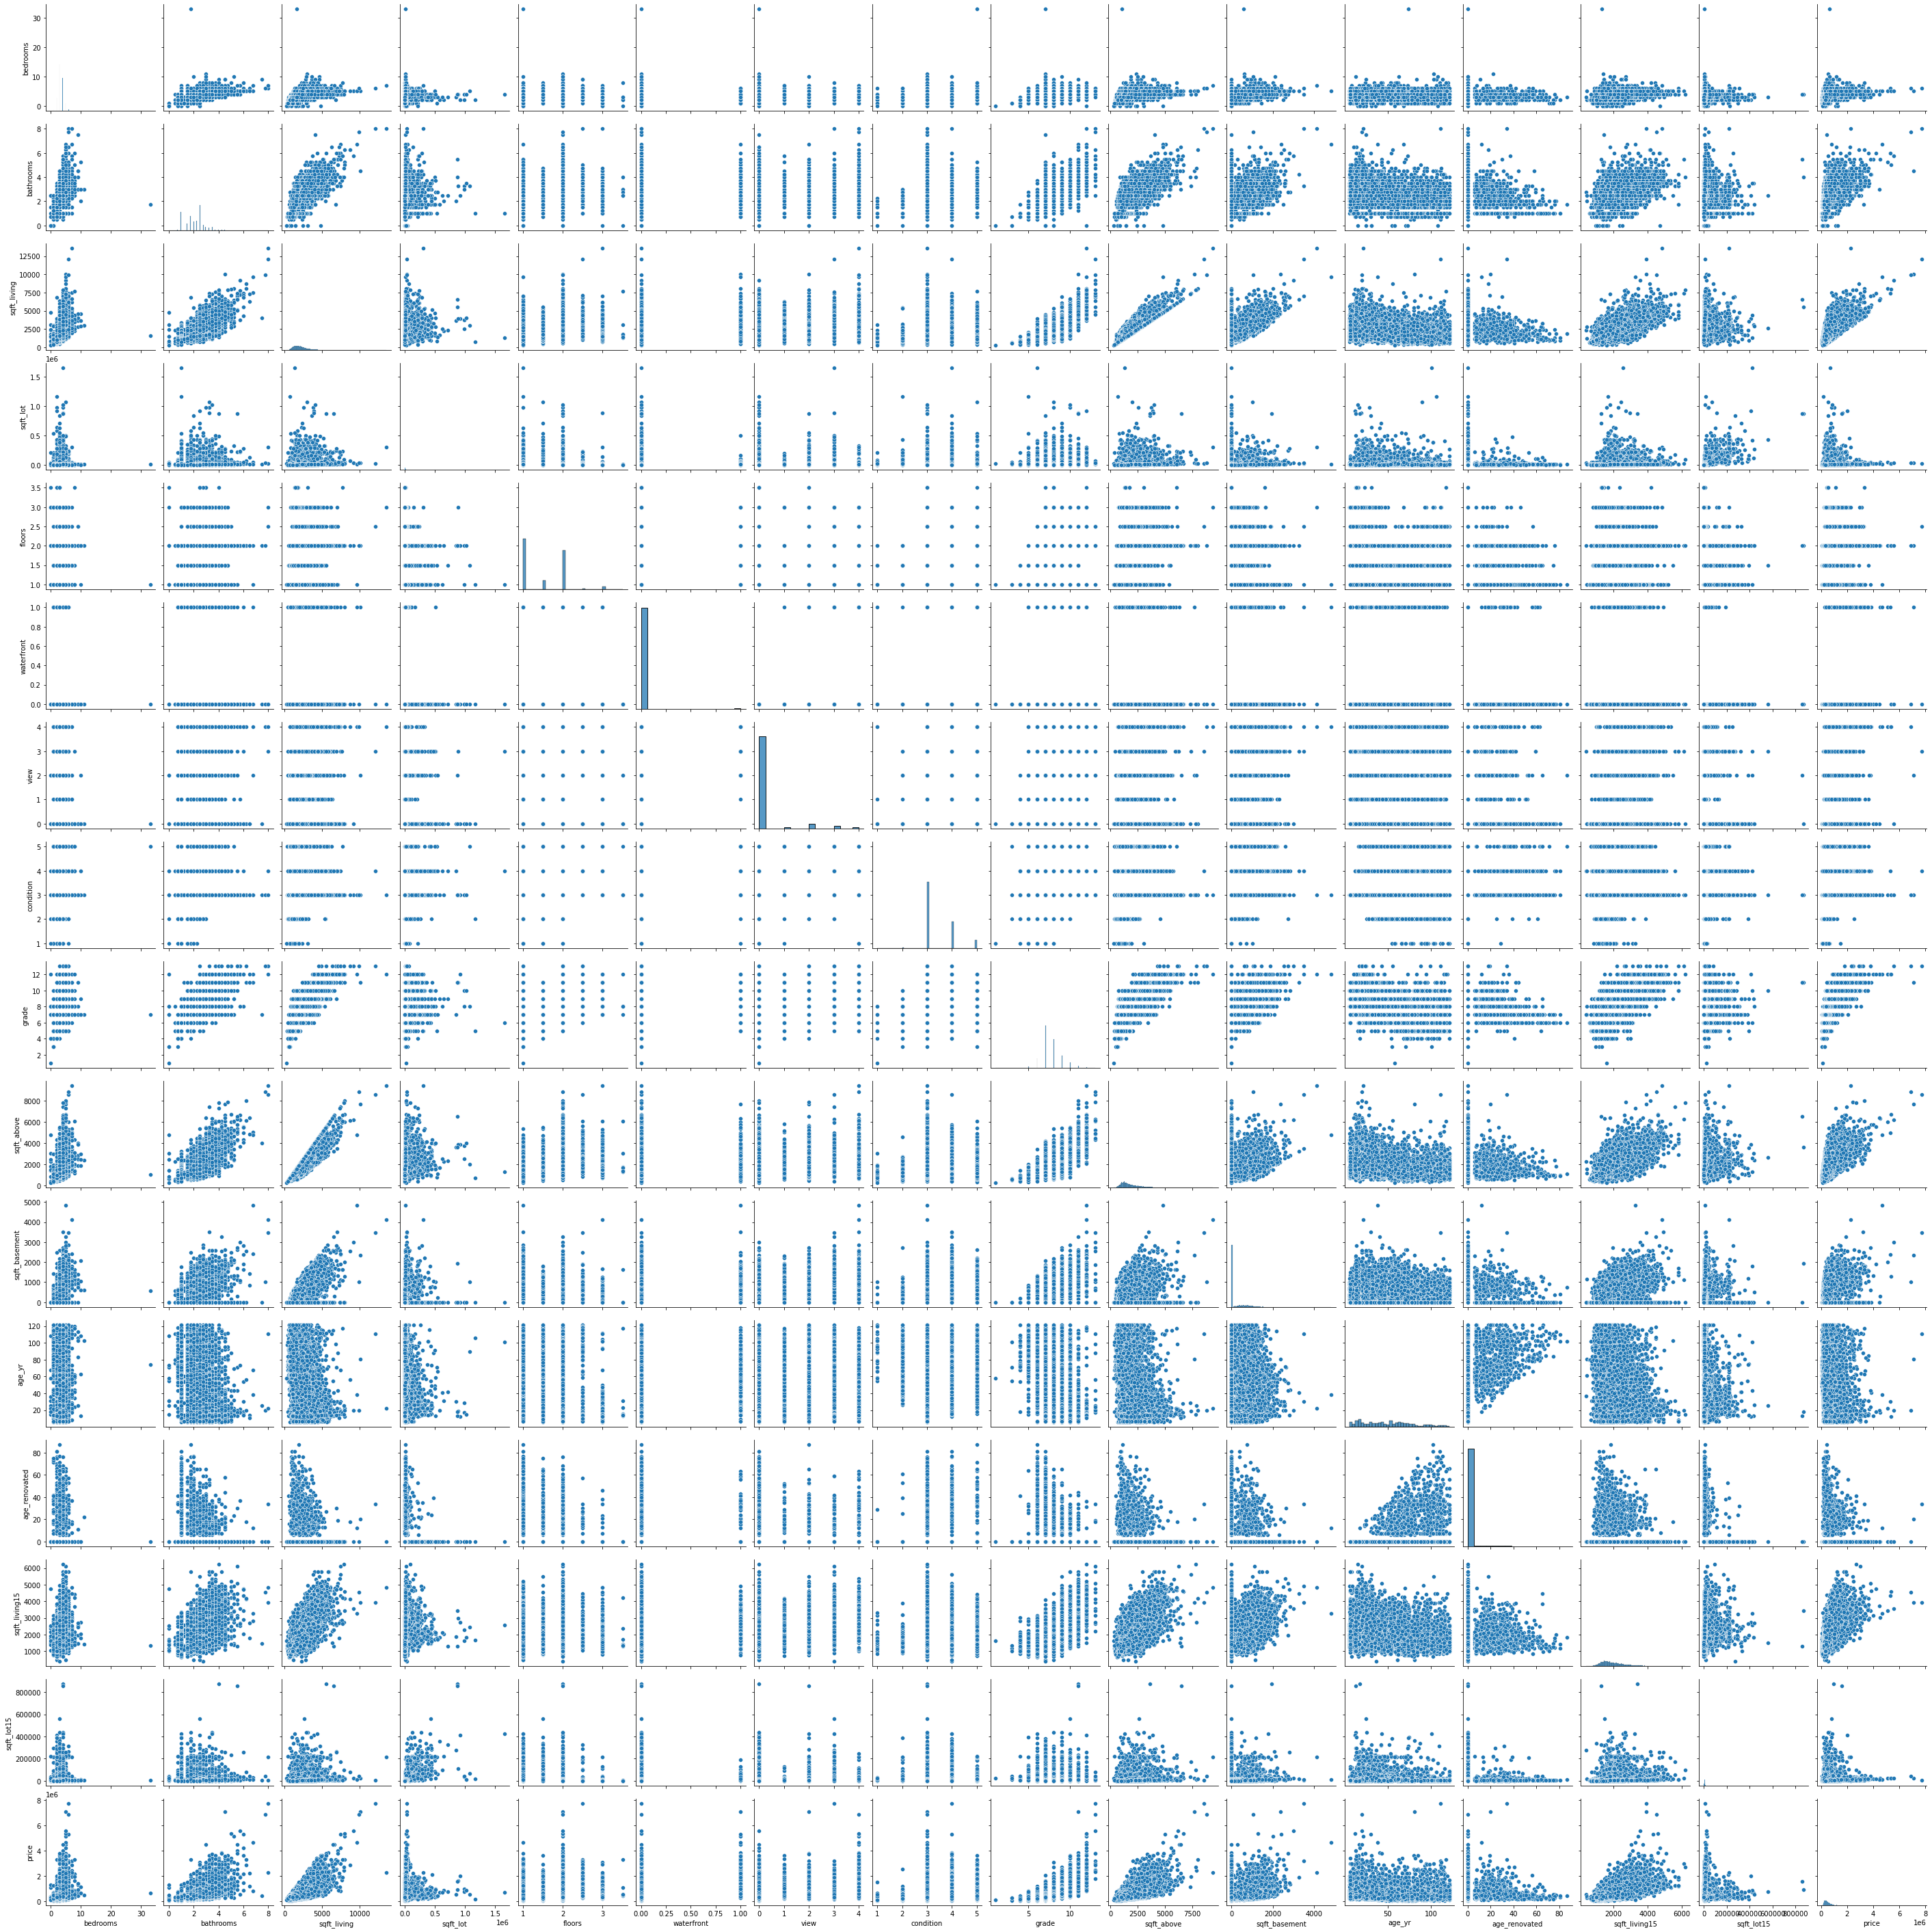

In [ ]:
import seaborn as sns
sns.pairplot(df2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  age_yr         21613 non-null  int64  
 12  age_renovated  21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  price          21613 non-null  float64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [ ]:
X_1 = df2[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade"]]

In [ ]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [ ]:
print(X)

[[3.000e+00 1.000e+00 1.180e+03 ... 0.000e+00 1.340e+03 5.650e+03]
 [3.000e+00 2.250e+00 2.570e+03 ... 3.000e+01 1.690e+03 7.639e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 0.000e+00 2.720e+03 8.062e+03]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 1.020e+03 2.007e+03]
 [3.000e+00 2.500e+00 1.600e+03 ... 0.000e+00 1.410e+03 1.287e+03]
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 1.020e+03 1.357e+03]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modelling 

### Multivariate Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-3.80747666e+04  4.56804804e+04  1.11563795e+02  2.49613196e-02
  2.99215460e+04  6.06679394e+05  4.36955416e+04  1.77022408e+04
  1.17757014e+05  5.29403635e+01  5.86234314e+01  3.67188525e+03
 -5.21630279e+02  2.59791195e+01 -6.02625023e-01]
-1019737.9579688009


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred) # Goodness of fit 

0.6454513925464083

In [ ]:
accuracy_lr = r2_score(y_test, y_pred)
accuracy_lr_1 = accuracy_lr * 100
print(f"The Accuracy for Multivariate Linear Regression is {round(accuracy_lr_1)} %")

The Accuracy for Multivariate Linear Regression is 65 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state=0)
regressor_rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_rf = regressor_rf.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_rf)

0.7536783717823284

In [ ]:
accuracy_rf = r2_score(y_test, y_pred_rf)
accuracy_rf

0.7536783717823284

In [ ]:
accuracy_rf = r2_score(y_test, y_pred_rf)
accuracy_rf_1 = accuracy_rf * 100
print(f"The Accuracy for Random Forest is {round(accuracy_rf_1)} %")

The Accuracy for Random Forest is 75 %


### Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred_dt = regressor_dt.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_dt)

0.5447153328798295

In [ ]:
accuracy_dt = r2_score(y_test, y_pred_dt)
accuracy_dt_1 = accuracy_dt * 100
print(f"The Accuracy for Decision Tree is {round(accuracy_dt_1)} %")

The Accuracy for Decision Tree is 54 %


### Support Vector Regression 

In [ ]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [ ]:
y_svr = y.reshape(len(y), 1)

In [ ]:
y_svr

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [ ]:
y_svr.reshape(-1, 1)

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [ ]:
## Feature Scaling 

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_svr = sc_X.fit_transform(X)
y_svr = sc_y.fit_transform(y_svr)

In [ ]:
print(X_svr)

[[-0.39873715 -1.44746357 -0.97983502 ... -0.17783035 -0.9433552
  -0.26071541]
 [-0.39873715  0.1756067   0.53363434 ...  4.83361866 -0.43268619
  -0.18786773]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.17783035  1.07013975
  -0.17237524]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.17783035 -1.41025258
  -0.39414129]
 [-0.39873715  0.50022075 -0.52252773 ... -0.17783035 -0.8412214
  -0.42051149]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.17783035 -1.41025258
  -0.41794772]]


In [ ]:
print(y_svr)

[[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 ...
 [-0.37586519]
 [-0.38158814]
 [-0.58588173]]


In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_svr, y_svr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))

In [ ]:
r2_score(y_test, y_pred_svr)

0.7468215688393044

In [ ]:
accuracy_svr = r2_score(y_test, y_pred_svr)
accuracy_svr_1 = accuracy_svr * 100
print(f"The Accuracy for Decision Tree is {round(accuracy_svr_1)} %")

The Accuracy for Decision Tree is 75 %


In [ ]:
mean = X_train.mean(axis=0) 
X_train -= mean
std = X_train.std(axis=0) 
X_train /= std

# Now the same for the test data - but use the same normalisation as the training data - otherwise it may break things

X_test -= mean 
X_test /= std 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
  model = models.Sequential([
      layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
      layers.Dense(64, activation='relu'), 
      layers.Dense(1) # note no activation as otherwise we limit the values which can come out 
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model

def build_model_add():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
  model.add(layers.Dense(64, activation='relu')) 
  model.add(layers.Dense(1)) 
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model

def build_model_add_functional():
  input = layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)) 
  hidden1 = layers.Dense(64, activation='relu')(input) 
  output = layers.Dense(1)(hidden1) 
  model = keras.models.Model(input, output)
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model

In [ ]:
model = build_model() 
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1) 

test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("MAE(test) = ", test_mae)

Epoch 1/20
17290/17290 [==============================] - 22s 1ms/step - loss: 211691388928.0000 - mae: 306134.5625
Epoch 2/20
17290/17290 [==============================] - 21s 1ms/step - loss: 89776521216.0000 - mae: 165598.2344
Epoch 3/20
17290/17290 [==============================] - 22s 1ms/step - loss: 81486725120.0000 - mae: 150427.2969
Epoch 4/20
17290/17290 [==============================] - 21s 1ms/step - loss: 78078312448.0000 - mae: 144352.1406
Epoch 5/20
17290/17290 [==============================] - 21s 1ms/step - loss: 76943114240.0000 - mae: 142210.1562
Epoch 6/20
17290/17290 [==============================] - 21s 1ms/step - loss: 76219138048.0000 - mae: 141431.6719
Epoch 7/20
17290/17290 [==============================] - 21s 1ms/step - loss: 75758690304.0000 - mae: 140601.3125
Epoch 8/20
17290/17290 [==============================] - 21s 1ms/step - loss: 75256586240.0000 - mae: 140255.5625
Epoch 9/20
17290/17290 [==============================] - 21s 1ms/step - loss: 